# Calculating the num of types

In [1]:
from bert_score import BERTScorer
scorer = BERTScorer(lang="en", verbose=True)
Precision, Recall, F1 = scorer.score(predictions, targets)

TypeError: __init__() got an unexpected keyword argument 'verbose'

In [16]:
with open(os.path.join(f'Exp/Exp62/save/ET_test_outputs_test.txt'), 'r', encoding='utf-8') as f:
    predictions = f.readlines()
with open(os.path.join(f'Exp/Exp62/save/ET_test_targets_test.txt'), 'r', encoding='utf-8') as f:
    targets = f.readlines()

In [17]:
print(len(predictions))
print(len(targets))

22340
22340


In [18]:
print(targets[0])
print(predictions[0])

wikicat St. Mirren F.C. players [sep]

wikicat Living people [sep] wikicat Hartlepool United F.C. players [sep] wikicat Clyde F.C. players [sep] wikicat Dundee F.C. players [sep] wikicat St. Mirren F.C. players [sep] wikicat Scottish Football League managers [sep] wikicat Scotland international footballers [sep] wikicat Forfar Athletic F.C. players [sep] wikicat Dumbarton F.C.



In [19]:
pred_tokens = []
tgt_tokens = []
for i in range(len(predictions)):
  pred_tokens.extend(predictions[i].split("[sep]"))
  tgt_tokens.extend(targets[i].split("[sep]"))

In [20]:
print(len(pred_tokens))
print(len(tgt_tokens))

173093
65448


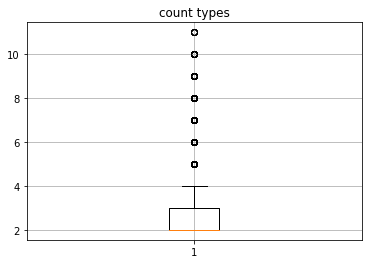

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# ターゲットの平均個数
num_tokens = []
for i in range(len(targets)):
  num_tokens.append(len(targets[i].split("[sep]")))
# math = [162, 168, 172, 181, 176, 168, 173, 175, 162, 169]
x = np.array(num_tokens)
plt.title('count types')
plt.grid() # 横線ラインを入れることができます。

plt.boxplot(x)
plt.show()

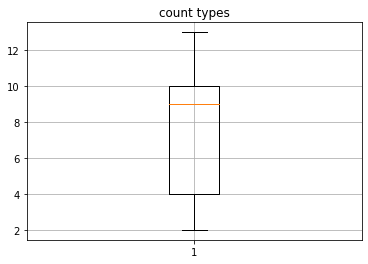

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# 出力の平均個数
num_tokens = []
for i in range(len(predictions)):
  num_tokens.append(len(predictions[i].split("[sep]")))
# math = [162, 168, 172, 181, 176, 168, 173, 175, 162, 169]
x = np.array(num_tokens)
plt.title('count types')
plt.grid() # 横線ラインを入れることができます。

plt.boxplot(x)
plt.show()

In [24]:
targets[0].split("[sep]")

['wikicat St. Mirren F.C. players ', '\n']

In [25]:
targets[1].split("[sep]")

['wikicat Film directors from Missouri ', '\n']

In [27]:
targets[0:10]

['wikicat St. Mirren F.C. players [sep]\n',
 'wikicat Film directors from Missouri [sep]\n',
 'wikicat Notts County F.C. players [sep]\n',
 'wikicat States and territories established in 1649 [sep]\n',
 'wikicat Provinces of Belgium [sep]\n',
 'wordnet county 108546183 [sep]\n',
 'wikicat Tamil film editors [sep]\n',
 'wikicat Former Indian capital cities [sep]\n',
 'wordnet club 108227214 [sep]\n',
 'wikicat Degerfors IF players [sep] wikicat Expatriate footballers in Italy [sep] wikicat Association football central defenders [sep] wikicat Aston Villa F.C. players [sep]\n']

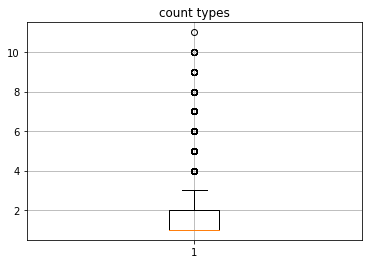

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# ターゲットの平均個数
num_tokens = []
for i in range(len(targets)):
  num_tokens.append(len([item for item in targets[i].split("[sep]") if item!="\n"]))
# math = [162, 168, 172, 181, 176, 168, 173, 175, 162, 169]
x = np.array(num_tokens)
plt.title('count types')
plt.grid() # 横線ラインを入れることができます。

plt.boxplot(x)
plt.show()

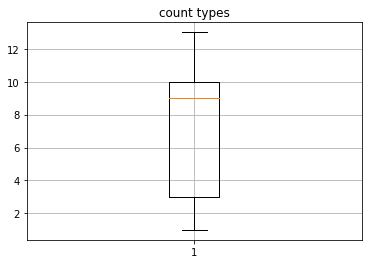

In [33]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# 出力の平均個数
num_tokens = []
for i in range(len(predictions)):
  num_tokens.append(len([item for item in predictions[i].split("[sep]") if item!="\n"]))
# math = [162, 168, 172, 181, 176, 168, 173, 175, 162, 169]
x = np.array(num_tokens)
plt.title('count types')
plt.grid() # 横線ラインを入れることができます。

plt.boxplot(x)
plt.show()

# Matching algorithm using Bert score

## Definition
$$
Tokens = {tokens(1), tokens(2), token(3), ..., tokens(n)}
$$

$$
Tokens' = {tokens'(1), tokens'(2), token'(3), ..., tokens'(n')}
$$

n : the length of target tokens

n' : the length of generated tokens

## Algorithm
$$
\argmax_{Tokens(i), Tokens'(j)} (P_{ij}) \quad  (i: 1 \quad to \quad n,\quad  j: \quad 1 \quad to \quad n')
$$

$$
P_{ij} = softmax(BERT_{SCORE}(Tokens(i), Tokens'(j)))
$$

$$
Tokens = Tokens - Tokens(i)
$$

$$
Tokens' = Tokens' - Tokens'(j)
$$

iterate this loop until Tokens or Tokens' are null.

In [3]:
from bert_score import BERTScorer
scorer = BERTScorer(lang="en")
Precision, Recall, F1 = scorer.score(predictions, targets)

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

NameError: name 'predictions' is not defined

#  清書

In [2]:
with open(os.path.join(f'Exp/Exp62/save/ET_test_outputs_test.txt'), 'r', encoding='utf-8') as f:
    predictions = f.readlines()
with open(os.path.join(f'Exp/Exp62/save/ET_test_targets_test.txt'), 'r', encoding='utf-8') as f:
    targets = f.readlines()

In [3]:
predictions_tokens = []
targets_tokens = []
for i in range(len(predictions)):
  predictions_tokens.append([item.strip() for item in predictions[i].strip().split("[sep]") if item!="\n" and item!=''])
for i in range(len(targets)):
  targets_tokens.append([item.strip() for item in targets[i].strip().split("[sep]") if item!="\n" and item!=''])

In [ ]:
from bert_score import BERTScorer
import torch
import nltk.translate.bleu_score as bleu
def calc_bert_classification(predictions_tokens, targets_tokens):
  list_all_combination_target = []
  list_all_combination_prediction = []
  list_combination_count = []
  for i in range(len(targets_tokens)):
    for j in range(len(targets_tokens[i])):
      for l in range(len(predictions_tokens[i])):
        list_all_combination_target.append(targets_tokens[i][j])
        list_all_combination_prediction.append(predictions_tokens[i][l])
    list_combination_count.append(len(targets_tokens[i]) * len(predictions_tokens[i]))

  scorer = BERTScorer(lang="en")
  Precision, Recall, F1 = scorer.score(list_all_combination_prediction, list_all_combination_target)

  def cumsum(comb_list: list):
    sum_comb_list = []
    sum = 0
    for item in comb_list:
      sum_comb_list.append(sum+item)
      sum += item
    return sum_comb_list
  list_combination_count_with_zero = [0] + list_combination_count
  sum = 0
  sum_combination_count = cumsum(list_combination_count_with_zero)
    
  for i in range(1,len(list_combination_count_with_zero)):
    tmp_combination_targets = list_all_combination_target[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_combination_predictions = list_all_combination_prediction[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_Precision = Precision[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_Recall = Recall[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_F1 = F1[sum_combination_count[i-1]:sum_combination_count[i]]
    assert len(tmp_combination_targets)==len(tmp_combination_predictions)
    assert len(tmp_combination_predictions)==len(tmp_F1)

    list_comb = []
    # loop until tmp_F1 is null
    while len(tmp_F1) != 0:
      # get max index
      max_index = torch.argmax(tmp_F1)

      # get combination
      list_comb.append(tuple((tmp_combination_predictions[max_index], tmp_combination_targets[max_index])))

      # remove entity from tmp_combination_targets and tmp_combination_predictions
      list_delete_target_index = []
      list_delete_prediction_index = []
      for index, item in enumerate(tmp_combination_targets):
        if item==tmp_combination_targets[max_index]:
          list_delete_target_index.append(index)
      for index, item in enumerate(tmp_combination_predictions):
        if item==tmp_combination_predictions[max_index]:
          list_delete_prediction_index.append(index)
      list_select_index = []
      for i in range(len(tmp_F1)):
        if len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0] and len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
          list_delete_prediction_index.pop(0)
          list_delete_target_index.pop(0)
        elif len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0]:
          list_delete_prediction_index.pop(0)
        elif len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
          list_delete_target_index.pop(0)
        else:
          list_select_index.append(i)
      if len(list_select_index) > 0:
        tmp_F1 = torch.index_select(tmp_F1, 0, torch.tensor(list_select_index))
        tmp_combination_targets = [item for i, item in enumerate(tmp_combination_targets) if i in list_select_index]
        tmp_combination_predictions = [item for i, item in enumerate(tmp_combination_predictions) if i in list_select_index]
      else:
        tmp_F1 = torch.Tensor()
        tmp_combination_targets = []
        tmp_combination_predictions = []
      assert len(tmp_combination_targets)==len(tmp_combination_predictions)
      assert len(tmp_combination_predictions)==len(tmp_F1)

    def evaluate_score(list_comb):
      predicts = []
      targets = []
      for index_list_comb in range(list_comb):
        predict, target = list_comb[index_list_comb]
        predicts.append(predict)
        targets.append(target)
      # calc bleu score
      total_score_1gram = 0
      total_score_2gram = 0
      total_score_3gram = 0
      total_score_4gram = 0

      for tgt, pred in zip(targets, predictions):
          hyp = pred.split()
          ref = tgt.split()
          total_score_1gram += bleu.sentence_bleu([ref], hyp, weights=(1, 0, 0, 0))
          total_score_2gram += bleu.sentence_bleu([ref], hyp, weights=(0, 1, 0, 0))
          total_score_3gram += bleu.sentence_bleu([ref], hyp, weights=(0, 0, 1, 0))
          total_score_4gram += bleu.sentence_bleu([ref], hyp, weights=(0, 0, 0, 1))
      score_1gram = total_score_1gram/len(targets)
      score_2gram = total_score_2gram/len(targets)
      score_3gram = total_score_3gram/len(targets)
      score_4gram = total_score_4gram/len(targets)

      return score_1gram, score_2gram, score_3gram, score_4gram
      


In [4]:
list_all_combination_target = []
list_all_combination_prediction = []
list_combination_count = []
for i in range(len(targets_tokens)):
  for j in range(len(targets_tokens[i])):
    for l in range(len(predictions_tokens[i])):
      list_all_combination_target.append(targets_tokens[i][j])
      list_all_combination_prediction.append(predictions_tokens[i][l])
  list_combination_count.append(len(targets_tokens[i]) * len(predictions_tokens[i]))
  if i > 10:
    break

In [5]:
from bert_score import BERTScorer
scorer = BERTScorer(lang="en")
Precision, Recall, F1 = scorer.score(list_all_combination_prediction, list_all_combination_target)

In [19]:
def cumsum(comb_list: list):
  sum_comb_list = []
  sum = 0
  for item in comb_list:
    sum_comb_list.append(sum+item)
    sum += item
  return sum_comb_list
list_combination_count_with_zero = [0] + list_combination_count
sum = 0
sum_combination_count = cumsum(list_combination_count_with_zero)
  
import torch
for i in range(1,len(list_combination_count_with_zero)):
  tmp_combination_targets = list_all_combination_target[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_combination_predictions = list_all_combination_prediction[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_Precision = Precision[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_Recall = Recall[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_F1 = F1[sum_combination_count[i-1]:sum_combination_count[i]]
  assert len(tmp_combination_targets)==len(tmp_combination_predictions)
  assert len(tmp_combination_predictions)==len(tmp_F1)

  list_comb = []
  # loop until tmp_F1 is null
  while len(tmp_F1) != 0:
    # get max index
    max_index = torch.argmax(tmp_F1)

    # get combination
    list_comb.append(tuple((tmp_combination_predictions[max_index], tmp_combination_targets[max_index])))

    # remove entity from tmp_combination_targets and tmp_combination_predictions
    list_delete_target_index = []
    list_delete_prediction_index = []
    for index, item in enumerate(tmp_combination_targets):
      if item==tmp_combination_targets[max_index]:
        list_delete_target_index.append(index)
    for index, item in enumerate(tmp_combination_predictions):
      if item==tmp_combination_predictions[max_index]:
        list_delete_prediction_index.append(index)
    list_select_index = []
    for i in range(len(tmp_F1)):
      if len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0] and len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
        list_delete_prediction_index.pop(0)
        list_delete_target_index.pop(0)
      elif len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0]:
        list_delete_prediction_index.pop(0)
      elif len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
        list_delete_target_index.pop(0)
      else:
        list_select_index.append(i)
    if len(list_select_index) > 0:
      tmp_F1 = torch.index_select(tmp_F1, 0, torch.tensor(list_select_index))
      tmp_combination_targets = [item for i, item in enumerate(tmp_combination_targets) if i in list_select_index]
      tmp_combination_predictions = [item for i, item in enumerate(tmp_combination_predictions) if i in list_select_index]
    else:
      tmp_F1 = torch.Tensor()
      tmp_combination_targets = []
      tmp_combination_predictions = []
    assert len(tmp_combination_targets)==len(tmp_combination_predictions)
    assert len(tmp_combination_predictions)==len(tmp_F1)

In [18]:
list_comb

[('wikicat St. Mirren F.C. players', 'wikicat St. Mirren F.C. players'),
 ('wikicat People from Kansas City, Missouri',
  'wikicat Film directors from Missouri'),
 ('wikicat Notts County F.C. players', 'wikicat Notts County F.C. players'),
 ('wikicat Former countries in the British Isles',
  'wikicat States and territories established in 1649'),
 ('wikicat Provinces of Flanders', 'wikicat Provinces of Belgium'),
 ('wordnet county 108546183', 'wordnet county 108546183'),
 ('wikicat Indian film directors', 'wikicat Tamil film editors'),
 ('wikicat Cities and towns in Kozhikode district',
  'wikicat Former Indian capital cities'),
 ('wordnet club 108227214', 'wordnet club 108227214'),
 ('wikicat Expatriate footballers in England',
  'wikicat Expatriate footballers in Italy'),
 ('wikicat Villarreal CF footballers', 'wikicat Aston Villa F.C. players'),
 ('wikicat Sweden international footballers',
  'wikicat Association football central defenders'),
 ('wikicat Serie A footballers', 'wikicat

## listing all of the combination

In [31]:
predictions_tokens = []
targets_tokens = []
for i in range(len(predictions)):
  predictions_tokens.append([item.strip() for item in predictions[i].strip().split("[sep]") if item!="\n" and item!=''])
for i in range(len(targets)):
  targets_tokens.append([item.strip() for item in targets[i].strip().split("[sep]") if item!="\n" and item!=''])

In [46]:
predictions_tokens[0:10]

[['wikicat Living people',
  'wikicat Hartlepool United F.C. players',
  'wikicat Clyde F.C. players',
  'wikicat Dundee F.C. players',
  'wikicat St. Mirren F.C. players',
  'wikicat Scottish Football League managers',
  'wikicat Scotland international footballers',
  'wikicat Forfar Athletic F.C. players',
  'wikicat Dumbarton F.C.'],
 ['wordnet person 100007846',
  'wikicat Screenwriters',
  'wikicat American people of English descent',
  'wikicat People from Kansas City, Missouri',
  'wikicat American film directors',
  'wikicat Film producers',
  'wikicat American screenwriters',
  'wikicat American people',
  'wikicat American film directors',
  'wikicat American screenwriters',
  'wikicat American people'],
 ['wikicat Football Conference players',
  'wikicat Living people',
  'wikicat The Football League players',
  'wikicat Hartlepool United F.C. players',
  'wikicat Peterborough United F.C. players',
  'wikicat Notts County F.C. players',
  'wikicat St Neots Town F.C. players'

In [34]:
targets_tokens[0:10]

[['wikicat St. Mirren F.C. players'],
 ['wikicat Film directors from Missouri'],
 ['wikicat Notts County F.C. players'],
 ['wikicat States and territories established in 1649'],
 ['wikicat Provinces of Belgium'],
 ['wordnet county 108546183'],
 ['wikicat Tamil film editors'],
 ['wikicat Former Indian capital cities'],
 ['wordnet club 108227214'],
 ['wikicat Degerfors IF players',
  'wikicat Expatriate footballers in Italy',
  'wikicat Association football central defenders',
  'wikicat Aston Villa F.C. players']]

In [86]:
list_all_combination_target = []
list_all_combination_prediction = []
list_combination_count = []
for i in range(len(targets_tokens)):
  for j in range(len(targets_tokens[i])):
    for l in range(len(predictions_tokens[i])):
      list_all_combination_target.append(targets_tokens[i][j])
      list_all_combination_prediction.append(predictions_tokens[i][l])
  list_combination_count.append(len(targets_tokens[i]) * len(predictions_tokens[i]))
  break

In [87]:
list_combination_count

[9]

In [88]:
from bert_score import BERTScorer
scorer = BERTScorer(lang="en")
Precision, Recall, F1 = scorer.score(list_all_combination_prediction, list_all_combination_target)

In [89]:
Precision

tensor([0.8954, 0.9452, 0.9727, 0.9771, 1.0000, 0.9111, 0.9174, 0.9588, 0.9556])

In [90]:
Recall

tensor([0.8725, 0.9564, 0.9474, 0.9677, 1.0000, 0.9109, 0.9144, 0.9574, 0.9381])

In [91]:
F1

tensor([0.8838, 0.9508, 0.9599, 0.9724, 1.0000, 0.9110, 0.9159, 0.9581, 0.9467])

In [92]:
list_all_combination_target

['wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players']

In [93]:
list_all_combination_prediction

['wikicat Living people',
 'wikicat Hartlepool United F.C. players',
 'wikicat Clyde F.C. players',
 'wikicat Dundee F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat Scottish Football League managers',
 'wikicat Scotland international footballers',
 'wikicat Forfar Athletic F.C. players',
 'wikicat Dumbarton F.C.']

In [94]:
def cumsum(comb_list: list):
  sum_comb_list = []
  sum = 0
  for item in comb_list:
    sum_comb_list.append(sum+item)
    sum += item
  return sum_comb_list
list_combination_count = [0] + list_combination_count
sum = 0
sum_combination_count = cumsum(list_combination_count)
  

In [141]:
import torch
for i in range(1,len(list_combination_count)):
  tmp_combination_targets = list_all_combination_target[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_combination_predictions = list_all_combination_prediction[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_Precision = Precision[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_Recall = Recall[sum_combination_count[i-1]:sum_combination_count[i]]
  tmp_F1 = F1[sum_combination_count[i-1]:sum_combination_count[i]]
  assert len(tmp_combination_targets)==len(tmp_combination_predictions)
  assert len(tmp_combination_predictions)==len(tmp_F1)

  # get max index
  max_index = torch.argmax(tmp_F1)

  # get combination
  list_comb = []
  list_comb.append(tuple((tmp_combination_predictions[max_index], tmp_combination_targets[max_index])))

  # remove entity from tmp_combination_targets and tmp_combination_predictions
  list_delete_target_index = []
  list_delete_prediction_index = []
  for index, item in enumerate(tmp_combination_targets):
    if item==tmp_combination_targets[max_index]:
      list_delete_target_index.append(index)
  for index, item in enumerate(tmp_combination_predictions):
    if item==tmp_combination_predictions[max_index]:
      list_delete_prediction_index.append(index)
  tmp_combination_targets = [item for item in tmp_combination_targets if item!=tmp_combination_targets[max_index]]
  tmp_combination_predictions = [item for item in tmp_combination_predictions if item!=tmp_combination_predictions[max_index]]
  list_select_index = []
  for i in range(len(tmp_F1)):
    if len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0] and len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
      list_delete_prediction_index.pop(0)
      list_delete_target_index.pop(0)
    elif len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0]:
      list_delete_prediction_index.pop(0)
    elif len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
      list_delete_target_index.pop(0)
    else:
      list_select_index.append(i)
  if len(list_select_index) > 0:
    torch.index_select(tmp_F1, 0, torch.tensor(list_select_index))
  else:
    tmp_F1 = torch.Tensor()

    

In [142]:
len(tmp_F1)

0

In [130]:
tmp_combination_targets

[]

In [134]:
len(tmp_combination_predictions)

8

In [104]:
list_comb

[('wikicat St. Mirren F.C. players', 'wikicat St. Mirren F.C. players')]

In [95]:
#list_combination_count

[0, 9]

In [96]:
sum_combination_count

[0, 9]

In [97]:
tmp_combination_targets

['wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players',
 'wikicat St. Mirren F.C. players']

## Pick up high probability

In [108]:
i = 2
T = torch.tensor([1,2,3,4,5])
T = torch.cat([T[0:i], T[i+1:-1]])
print(T)

tensor([1, 2, 4])


In [112]:
i = 0
T = torch.tensor([1,2,3,4,5])
T = torch.cat([T[0:i], T[i+1:]])
print(T)

tensor([2, 3, 4, 5])


In [113]:
x = torch.randn(3, 4)
x
indices = torch.tensor([0, 2])
torch.index_select(x, 0, indices)
torch.index_select(x, 1, indices)

tensor([[-0.1197, -1.3430],
        [-0.4491, -0.8478],
        [ 0.6152,  0.1116]])

In [136]:
x = torch.randn(3)
print(x)
indices = torch.tensor([0, 1, 0])
torch.index_select(x, 0, indices)
# torch.index_select(x, 1, indices)

tensor([ 0.1459, -0.5278, -0.7948])


tensor([ 0.1459, -0.5278,  0.1459])

In [124]:
tmp = [0,1,2,3]
tmp.pop(0)
tmp

[1, 2, 3]

# Bert Classification

In [30]:
from bert_score import BERTScorer
import torch
import nltk.translate.bleu_score as bleu
def bert_classification(predictions_tokens, targets_tokens):
  """
  input:
  predictions_tokens: 2dim list (num_predictions x num_separated_tokens)
  targets_tokens: 2dim list (num_targets x num_separated_tokens)

  output:
  predicts: 1dim list
  targets: 1dim list

  e.g.
  predictions_tokens
  [['wikicat Living people',
  'wikicat Hartlepool United F.C. players',
  'wikicat Clyde F.C. players',
  'wikicat Dundee F.C. players',
  'wikicat St. Mirren F.C. players',
  'wikicat Scottish Football League managers',
  'wikicat Scotland international footballers',
  'wikicat Forfar Athletic F.C. players',
  'wikicat Dumbarton F.C.'],
 ['wordnet person 100007846',
  'wikicat Screenwriters',
  'wikicat American people of English descent',
  'wikicat People from Kansas City, Missouri',
  'wikicat American film directors',
  'wikicat Film producers',
  'wikicat American screenwriters',
  'wikicat American people',
  'wikicat American film directors',
  'wikicat American screenwriters',
  'wikicat American people'],
 ['wikicat Football Conference players',
  'wikicat Living people',
  'wikicat The Football League players',
  'wikicat Hartlepool United F.C. players',
  'wikicat Peterborough United F.C. players',
...
 ['wikicat Former countries in Europe',
  'wikicat Former countries in the British Isles',
  'wikicat Former countries in Europe'],
 ['wikicat Provinces of Flanders',
  'wordnet administrative district 108491826']]

  targets_tokens
  [['wikicat St. Mirren F.C. players'],
  ['wikicat Film directors from Missouri'],
  ['wikicat Notts County F.C. players'],
  ['wikicat States and territories established in 1649'],
  ['wikicat Provinces of Belgium']]


  output:
  predicts
  ['wikicat St. Mirren F.C. players', 'wikicat People from Kansas City, Missouri', 'wikicat Notts County F.C. players', 'wikicat Former countries in the British Isles', 'wikicat Provinces of Flanders']

  targets:
  ['wikicat St. Mirren F.C. players', 'wikicat Film directors from Missouri', 'wikicat Notts County F.C. players', 'wikicat States and territories established in 1649', 'wikicat Provinces of Belgium']
  """
  list_all_combination_target = []
  list_all_combination_prediction = []
  list_combination_count = []
  for i in range(len(targets_tokens)):
    for j in range(len(targets_tokens[i])):
      for l in range(len(predictions_tokens[i])):
        list_all_combination_target.append(targets_tokens[i][j])
        list_all_combination_prediction.append(predictions_tokens[i][l])
    list_combination_count.append(len(targets_tokens[i]) * len(predictions_tokens[i]))
    if i > 10:
      break

  scorer = BERTScorer(lang="en")
  Precision, Recall, F1 = scorer.score(list_all_combination_prediction, list_all_combination_target)

  def cumsum(comb_list: list):
    sum_comb_list = []
    sum = 0
    for item in comb_list:
      sum_comb_list.append(sum+item)
      sum += item
    return sum_comb_list
  list_combination_count_with_zero = [0] + list_combination_count
  sum = 0
  sum_combination_count = cumsum(list_combination_count_with_zero)
    
  list_comb = []
  for i in range(1,len(list_combination_count_with_zero)):
    tmp_combination_targets = list_all_combination_target[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_combination_predictions = list_all_combination_prediction[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_Precision = Precision[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_Recall = Recall[sum_combination_count[i-1]:sum_combination_count[i]]
    tmp_F1 = F1[sum_combination_count[i-1]:sum_combination_count[i]]
    assert len(tmp_combination_targets)==len(tmp_combination_predictions)
    assert len(tmp_combination_predictions)==len(tmp_F1)

    # loop until tmp_F1 is null
    while len(tmp_F1) != 0:
      # get max index
      max_index = torch.argmax(tmp_F1)

      # get combination
      list_comb.append(tuple((tmp_combination_predictions[max_index], tmp_combination_targets[max_index])))

      # remove entity from tmp_combination_targets and tmp_combination_predictions
      list_delete_target_index = []
      list_delete_prediction_index = []
      for index, item in enumerate(tmp_combination_targets):
        if item==tmp_combination_targets[max_index]:
          list_delete_target_index.append(index)
      for index, item in enumerate(tmp_combination_predictions):
        if item==tmp_combination_predictions[max_index]:
          list_delete_prediction_index.append(index)
      list_select_index = []
      for i in range(len(tmp_F1)):
        if len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0] and len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
          list_delete_prediction_index.pop(0)
          list_delete_target_index.pop(0)
        elif len(list_delete_prediction_index) > 0 and i==list_delete_prediction_index[0]:
          list_delete_prediction_index.pop(0)
        elif len(list_delete_target_index) > 0 and i==list_delete_target_index[0]:
          list_delete_target_index.pop(0)
        else:
          list_select_index.append(i)
      if len(list_select_index) > 0:
        tmp_F1 = torch.index_select(tmp_F1, 0, torch.tensor(list_select_index))
        tmp_combination_targets = [item for i, item in enumerate(tmp_combination_targets) if i in list_select_index]
        tmp_combination_predictions = [item for i, item in enumerate(tmp_combination_predictions) if i in list_select_index]
      else:
        tmp_F1 = torch.Tensor()
        tmp_combination_targets = []
        tmp_combination_predictions = []
      assert len(tmp_combination_targets)==len(tmp_combination_predictions)
      assert len(tmp_combination_predictions)==len(tmp_F1)

  def get_target_predict(list_comb):
    predicts = []
    targets = []
    for index_list_comb in range(len(list_comb)):
      predict, target = list_comb[index_list_comb]
      predicts.append(predict)
      targets.append(target)
    return predicts, targets
  predicts, targets = get_target_predict(list_comb)
  return predicts, targets

In [25]:
with open(os.path.join(f'Exp/Exp62/save/ET_test_outputs_test.txt'), 'r', encoding='utf-8') as f:
    predictions = f.readlines()
with open(os.path.join(f'Exp/Exp62/save/ET_test_targets_test.txt'), 'r', encoding='utf-8') as f:
    targets = f.readlines()

In [26]:
predictions_tokens = []
targets_tokens = []
for i in range(len(predictions)):
  predictions_tokens.append([item.strip() for item in predictions[i].strip().split("[sep]") if item!="\n" and item!=''])
for i in range(len(targets)):
  targets_tokens.append([item.strip() for item in targets[i].strip().split("[sep]") if item!="\n" and item!=''])

In [31]:
prds, tgts = calc_bert_classification(predictions_tokens, targets_tokens)

In [38]:
print(prds[:5])

['wikicat St. Mirren F.C. players', 'wikicat People from Kansas City, Missouri', 'wikicat Notts County F.C. players', 'wikicat Former countries in the British Isles', 'wikicat Provinces of Flanders']


In [39]:
print(tgts[:5])

['wikicat St. Mirren F.C. players', 'wikicat Film directors from Missouri', 'wikicat Notts County F.C. players', 'wikicat States and territories established in 1649', 'wikicat Provinces of Belgium']
